In [550]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
config = {'font.size': 12,
          'mathtext.fontset': 'stix'}
mpl.rcParams.update(config)
import math

# 常量
R0 = 7 # m
p0 = 20 # MPa
G = 500 # MPa
G1 = 500 # MPa
G2 = 10000 # MPa
eta = 10000 # MPa·d
eta1 = 10000 # MPa·d
eta2 = 2000 # MPa·d
KS = 50 # 50kN·m^-3
r = 7 # m
ta = np.arange(2, 202, 1)
t = np.arange(2, 200, 1)
ti =  2
t_0 = np.arange(0,2,1)

In [551]:
deat_u_Maxwell = R0**2*p0/(2*G*r)+R0**2*p0*ti/(2*eta*r)
deat_u_Kelvin = R0**2*p0/(2*G*r)-R0**2*p0*math.exp(-G*ti/eta)/(2*G*r)
deat_u_Gen_Kelvin = R0**2*p0*(1/(2*G2)+1/(2*G1)*(1-math.exp(-G1*ti/eta)))
deat_u_Burgers = R0**2*p0*(G1+G2)/(2*G1*G2*r)-R0**2*p0*math.exp(-G2*ti/eta2)/(2*G2*r)+R0**2*p0*ti/(2*eta1*r)

In [552]:
varepsilon_r_Maxwell_0 = [-R0**2*p0/(2*G*r**2)-R0**2*p0*t0/(2*eta*r**2) for t0 in t_0]
varepsilon_r_Kelvin_0 = [-R0**2*p0/(2*G*r**2)-R0**2*p0*math.exp(-G*t0/eta)/(2*G*r**2) for t0 in t_0]
varepsilon_r_Gen_Kelvin_0 = [-R0**2*p0*math.exp(-G1*t0/eta)/(2*G1*r**2)-R0**2*p0*(G1+G2)/(2*G1*G2*r**2) for t0 in t_0]
varepsilon_r_Burgers_0 = [R0**2*p0*math.exp(-G2*t0/eta2)/(2*G1*r**2)-R0**2*p0*(G1+G2)/(2*G1*G2*r**2)-R0**2*p0*t0/(2*eta1*r**2) for t0 in t_0]

In [553]:
deat_u_Maxwell_0 = [R0**2*p0/(2*G*r)+R0**2*p0*t_i/(2*eta*r) for t_i in t_0] 
deat_u_Kelvin_0 = [R0**2*p0/(2*G*r)-R0**2*p0*math.exp(-G*t_i/eta)/(2*G*r) for t_i in t_0] 
deat_u_Gen_Kelvin_0 = [R0*p0*(1/(2*G2)+1/(2*G1)*(1-math.exp(-G1*t_i/eta))) for t_i in t_0] 
deat_u_Burgers_0 = [ R0**2*p0*(G1+G2)/(2*G1*G2*r)-R0**2*p0*math.exp(-G2*t_i/eta2)/(2*G2*r)+R0**2*p0*t_i/(2*eta1*r) for t_i in t_0] 

In [554]:
sigma_Maxwell_0=[R0**2*p0/(2*G*r)-R0**2*p0*t_i/(2*eta*r)*KS for t_i in t_0] 
sigma_Kelvin_0=[R0**2*p0/(2*G*r**2)-R0**2*p0*math.exp(-G*t_i/eta)/(2*G*r**2)*KS for t_i in t_0] 
sigma_Gen_Kelvin_0=[(R0*p0*(1/(2*G2)+1/(2*G1)*(1-math.exp(-G1*t_i/eta))))*KS for t_i in t_0] 
sigma_Burgers_0=[(p0*r*(1/(2*G2)+t_i/(2*eta2)+1/(2*G1)*(1-math.exp(-G1*t_i/eta))))*KS for t_i in t_0] 

In [563]:
result = pd.DataFrame()
result['t'] = ta
result.index = result['t']
result.drop('t', axis=1, inplace=True)

# Maxwell
# \sigma_r
sigma_r = [(1-((2*G)/(KS*R0+2*G))*(R0**2/r**2)*math.exp(-(KS*R0*G*t0)/((KS*R0+2*G)*eta)))*(p0+KS*deat_u_Maxwell) for t0 in t]
result['Maxwell_sigma_r'] = sigma_Maxwell_0+sigma_r
# \sigma_\theta
sigma_theta = [(1+((2*G)/(KS*R0+2*G))*(R0**2/r**2)*math.exp(-(KS*R0*G*t0)/((KS*R0+2*G)*eta)))*(p0+KS*deat_u_Maxwell) for t0 in t]
result['Maxwell_sigma_theta'] =  sigma_Maxwell_0+sigma_theta
# \varepsilon_r
varepsilon_r = [(-1+((2*G)/(KS*R0+2*G))*math.exp(-(KS*R0*G*t0)/((KS*R0+2*G)*eta)))*(R0/(KS*r**2))*(p0+KS*deat_u_Maxwell) for t0 in t]
result['Maxwell_varepsilon_r'] = varepsilon_r_Maxwell_0+varepsilon_r
# \varepsilon_\theta
varepsilon_theta = [-(-1+((2*G)/(KS*R0+2*G))*math.exp(-(KS*R0*G*t0)/((KS*R0+2*G)*eta)))*(R0/(KS*r**2))*(p0+KS*deat_u_Maxwell) for t0 in t]
result['Maxwell_varepsilon_theta'] = varepsilon_r_Maxwell_0+varepsilon_theta
# u_r
u_r = [-(-1+((2*G)/(KS*R0+2*G))*math.exp(-(KS*R0*G*t0)/((KS*R0+2*G)*eta)))*(R0/(KS*r))*(p0+KS*deat_u_Maxwell) for t0 in t]
result['Maxwell_u_r'] = deat_u_Maxwell_0+u_r

# Kelvin
# \sigma_r
sigma_r = [(1-((2*G)/(KS*R0+2*G))*(R0**2/r**2))*p0-((KS*R0)/(KS*R0+2*G))*(R0**2/r**2)*math.exp(-((KS*R0+2*G)*t0)/(2*eta))*(p0+KS*deat_u_Kelvin) for t0 in t]
result['Kelvin_sigma_r'] = sigma_Kelvin_0+sigma_r
# \sigma_\theta
sigma_theta = [(1+((2*G)/(KS*R0+2*G))*(R0**2/r**2))*p0+((KS*R0)/(KS*R0+2*G))*(R0**2/r**2)*math.exp(-((KS*R0+2*G)*t0)/(2*eta))*(p0+KS*deat_u_Kelvin) for t0 in t]
result['Kelvin_sigma_theta'] = sigma_Kelvin_0+sigma_theta
# \varepsilon_r
varepsilon_r = [(-1+math.exp(-((KS*R0+2*G)*t0)/(2*eta)))*(1/(KS*R0+2*G))*(R0**2/r**2)*(p0+KS*deat_u_Kelvin) for t0 in t]
result['Kelvin_varepsilon_r'] = varepsilon_r_Kelvin_0+varepsilon_r
# \varepsilon_\theta
varepsilon_theta = [-(-1+math.exp(-((KS*R0+2*G)*t0)/(2*eta)))*(1/(KS*R0+2*G))*(R0**2/r**2)*(p0+KS*deat_u_Kelvin) for t0 in t]
result['Kelvin_varepsilon_theta'] = varepsilon_r_Kelvin_0+varepsilon_theta
# u_r
u_r = [-(-1+math.exp(-((KS*R0+2*G)*t0)/(2*eta)))*(1/(KS*R0+2*G))*(R0**2/r)*(p0+KS*deat_u_Kelvin) for t0 in t]
result['Kelvin_u_r'] =deat_u_Kelvin_0+ u_r

# Generalized_Kelvin
# \sigma_r
sigma_r = [(1-((2*G1*G2)/(KS*R0*(G1+G2)+2*G1*G2))*(R0**2/r**2))*p0+(G1/((KS*R0+2*G2)*G1+KS*R0*G2)-1/(KS*R0+2*G2))*(2*G2*R0**2/r**2)*math.exp(-(G1/eta+(KS*R0*G2)/((KS*R0+2*G2)*eta))*t0)*(p0+KS*deat_u) for t0 in t]
result['Generalized_Kelvin_sigma_r'] = sigma_Gen_Kelvin_0+sigma_r
# \sigma_\theta
sigma_theta = [(1+((2*G1*G2)/(KS*R0*(G1+G2)+2*G1*G2))*(R0**2/r**2))*p0-(G1/((KS*R0+2*G2)*G1+KS*R0*G2)-1/(KS*R0+2*G2))*(2*G2*R0**2/r**2)*math.exp(-(G1/eta+(KS*R0*G2)/((KS*R0+2*G2)*eta))*t0)*(p0+KS*deat_u) for t0 in t]
result['Generalized_Kelvin_sigma_theta'] = sigma_Gen_Kelvin_0+sigma_theta
# \varepsilon_r
varepsilon_r = [(-(G1+G2)*(2*G2+KS*R0)+2*G2**2*math.exp(-(KS*R0*(G1+G2)+2*G1*G2)/((2*G2+KS*R0)*eta)*t0))/((KS*R0*(G1+G2)+2*G1*G2)*(2*G2+KS*R0)*r**2)*R0**2*(p0+KS*deat_u_Gen_Kelvin) for t0 in t]
result['Generalized_Kelvin_varepsilon_r'] = varepsilon_r_Gen_Kelvin_0+varepsilon_r
# \varepsilon_\theta
varepsilon_theta = [-(-(G1+G2)*(2*G2+KS*R0)+2*G2**2*math.exp(-(KS*R0*(G1+G2)+2*G1*G2)/((2*G2+KS*R0)*eta)*t0))/((KS*R0*(G1+G2)+2*G1*G2)*(2*G2+KS*R0)*r**2)*R0**2*(p0+KS*deat_u_Gen_Kelvin) for t0 in t]
result['Generalized_Kelvin_varepsilon_theta'] = varepsilon_r_Gen_Kelvin_0+varepsilon_theta
# u_r
u_r = [-(-(G1+G2)*(2*G2+KS*R0)+2*G2**2*math.exp(-(KS*R0*(G1+G2)+2*G1*G2)/((2*G2+KS*R0)*eta)*t0))/((KS*R0*(G1+G2)+2*G1*G2)*(2*G2+KS*R0)*r)*R0**2*(p0+KS*deat_u_Gen_Kelvin) for t0 in t]
result['Generalized_Kelvin_u_r'] = deat_u_Gen_Kelvin_0+u_r

# Burgers
sigma_1 = 2*G1*G2*eta1+G1*KS*R0*eta1+G1*KS*R0*eta2+G2*KS*R0*eta1
sigma_2 = 4*G1*eta1*eta2+2*KS*R0*eta1*eta2
sigma_4 = math.sqrt((G1**2)*(G2**2)*(eta1**2)+(G1**2)*G2*KS*R0*(eta1**2)-(G1**2)*G2*KS*R0*eta1*eta2+(G1**2)*(KS**2)*(R0**2)*(eta1**2)/4+(G1**2)*(KS**2)*(R0**2)*eta1*eta2/2+(G1**2)*(KS**2)*(R0**2)*(eta2**2)/4+G1*(G2**2)*KS*R0*(eta1**2)+G1*G2*(KS**2)*(R0**2)*(eta1**2)/2-G1*G2*(KS**2)*(R0**2)*eta1*eta2/2+(G2**2)*(KS**2)*(R0**2)*(eta1**2)/4)
sigma_5 = 2*G1+KS*R0
sigma_3 = sigma_4/(eta1*eta2*sigma_5)
# \sigma_r
sigma_r = [(p0+KS*deat_u_Burgers)-((2*G1)/(KS*R0+2*G1))*(R0**2/r**2)*math.exp(-sigma_1/sigma_2*t0)*(math.cosh(sigma_3*t0)-eta1*eta2*math.sinh(sigma_3*t0)*sigma_5*(sigma_1/sigma_2-G2/eta2)/sigma_4)*(p0+KS*deat_u_Burgers) for t0 in t]
result['Burgers_sigma_r'] = sigma_Burgers_0+sigma_r
# \sigma_\theta
sigma_theta = [(p0+KS*deat_u_Burgers)+((2*G1)/(KS*R0+2*G1))*(R0**2/r**2)*math.exp(-sigma_1/sigma_2*t0)*(math.cosh(sigma_3*t0)-eta1*eta2*math.sinh(sigma_3*t0)*sigma_5*(sigma_1/sigma_2-G2/eta2)/sigma_4)*(p0+KS*deat_u_Burgers) for t0 in t]
result['Burgers_sigma_theta'] = sigma_Burgers_0+sigma_theta
# \varepsilon_r
varepsilon_r = [(-1+((2*G1)/(KS*R0+2*G1))*(math.cosh(sigma_3*t0)-eta1*eta2*math.sinh(sigma_3*t0)*sigma_5*(sigma_1/sigma_2-G2/eta2)/sigma_4)*math.exp(-sigma_1*t0/sigma_2))*((R0*(p0+KS*deat_u_Burgers))/(KS*(r**2))) for t0 in t]
result['Burgers_varepsilon_r'] = varepsilon_r_Burgers_0+varepsilon_r
# \varepsilon_\theta
varepsilon_theta = [-(-1+((2*G1)/(KS*R0+2*G1))*(math.cosh(sigma_3*t0)-eta1*eta2*math.sinh(sigma_3*t0)*sigma_5*(sigma_1/sigma_2-G2/eta2)/sigma_4)*math.exp(-sigma_1*t0/sigma_2))*((R0*(p0+KS*deat_u_Burgers))/(KS*(r**2))) for t0 in t]
result['Burgers_varepsilon_theta'] = varepsilon_r_Burgers_0+varepsilon_theta
# u_r
u_r = [-(-1+((2*G1)/(KS*R0+2*G1))*(math.cosh(sigma_3*t0)-eta1*eta2*math.sinh(sigma_3*t0)*sigma_5*(sigma_1/sigma_2-G2/eta2)/sigma_4)*math.exp(-sigma_1*t0/sigma_2))*((R0*(p0+KS*deat_u_Burgers))/(KS*r)) for t0 in t]
result['Burgers_u_r'] = deat_u_Burgers_0+u_r

In [556]:
result

,Maxwell_sigma_r,Maxwell_sigma_theta,Maxwell_varepsilon_r,Maxwell_varepsilon_theta,Maxwell_u_r,Kelvin_sigma_r,Kelvin_sigma_theta,Kelvin_varepsilon_r,Kelvin_varepsilon_theta,Kelvin_u_r,Generalized_Kelvin_sigma_r,Generalized_Kelvin_sigma_theta,Generalized_Kelvin_varepsilon_r,Generalized_Kelvin_varepsilon_theta,Generalized_Kelvin_u_r,Burgers_sigma_r,Burgers_sigma_theta,Burgers_varepsilon_r,Burgers_varepsilon_theta,Burgers_u_r
t,,,,,,,,,,,,,,,,,,,,
2,0.140000,0.140000,-0.020000,-0.020000,0.140000,-0.980000,-0.980000,-0.040000,-0.040000,0.000000,0.350000,0.350000,-0.041000,-0.041000,0.007000,0.350000,0.350000,-0.001000,-0.001000,0.140000
3,-0.210000,-0.210000,-0.021000,-0.021000,0.147000,-0.931229,-0.931229,-0.039025,-0.039025,0.006828,0.691394,0.691394,-0.040025,-0.040025,0.013828,2.441394,2.441394,-0.021865,-0.021865,0.153953
4,7.706606,47.693394,-0.022019,0.022019,0.154132,0.503913,39.496087,-0.001933,0.001933,0.013532,0.976642,39.023358,-0.003783,0.003783,0.026480,8.057722,48.042246,-0.023022,0.023022,0.161154
5,7.964108,47.435892,-0.022755,0.022755,0.159282,0.809471,39.190529,-0.002806,0.002806,0.019643,1.262481,38.737519,-0.004890,0.004890,0.034230,8.311937,47.788031,-0.023748,0.023748,0.166239
6,8.218292,47.181708,-0.023481,0.023481,0.164366,1.095084,38.904916,-0.003622,0.003622,0.025356,1.529742,38.470258,-0.005925,0.005925,0.041476,8.562909,47.537059,-0.024465,0.024465,0.171258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,26.061879,29.338121,-0.074463,0.074463,0.521238,5.185175,34.814825,-0.015308,0.015308,0.107158,5.374761,34.625239,-0.020818,0.020818,0.145726,26.358527,29.741441,-0.075310,0.075310,0.527171
198,26.082977,29.317023,-0.074523,0.074523,0.521660,5.185176,34.814824,-0.015308,0.015308,0.107158,5.374762,34.625238,-0.020818,0.020818,0.145726,26.380034,29.719934,-0.075372,0.075372,0.527601
199,26.103803,29.296197,-0.074582,0.074582,0.522076,5.185176,34.814824,-0.015308,0.015308,0.107158,5.374763,34.625237,-0.020818,0.020818,0.145726,26.401268,29.698701,-0.075432,0.075432,0.528025


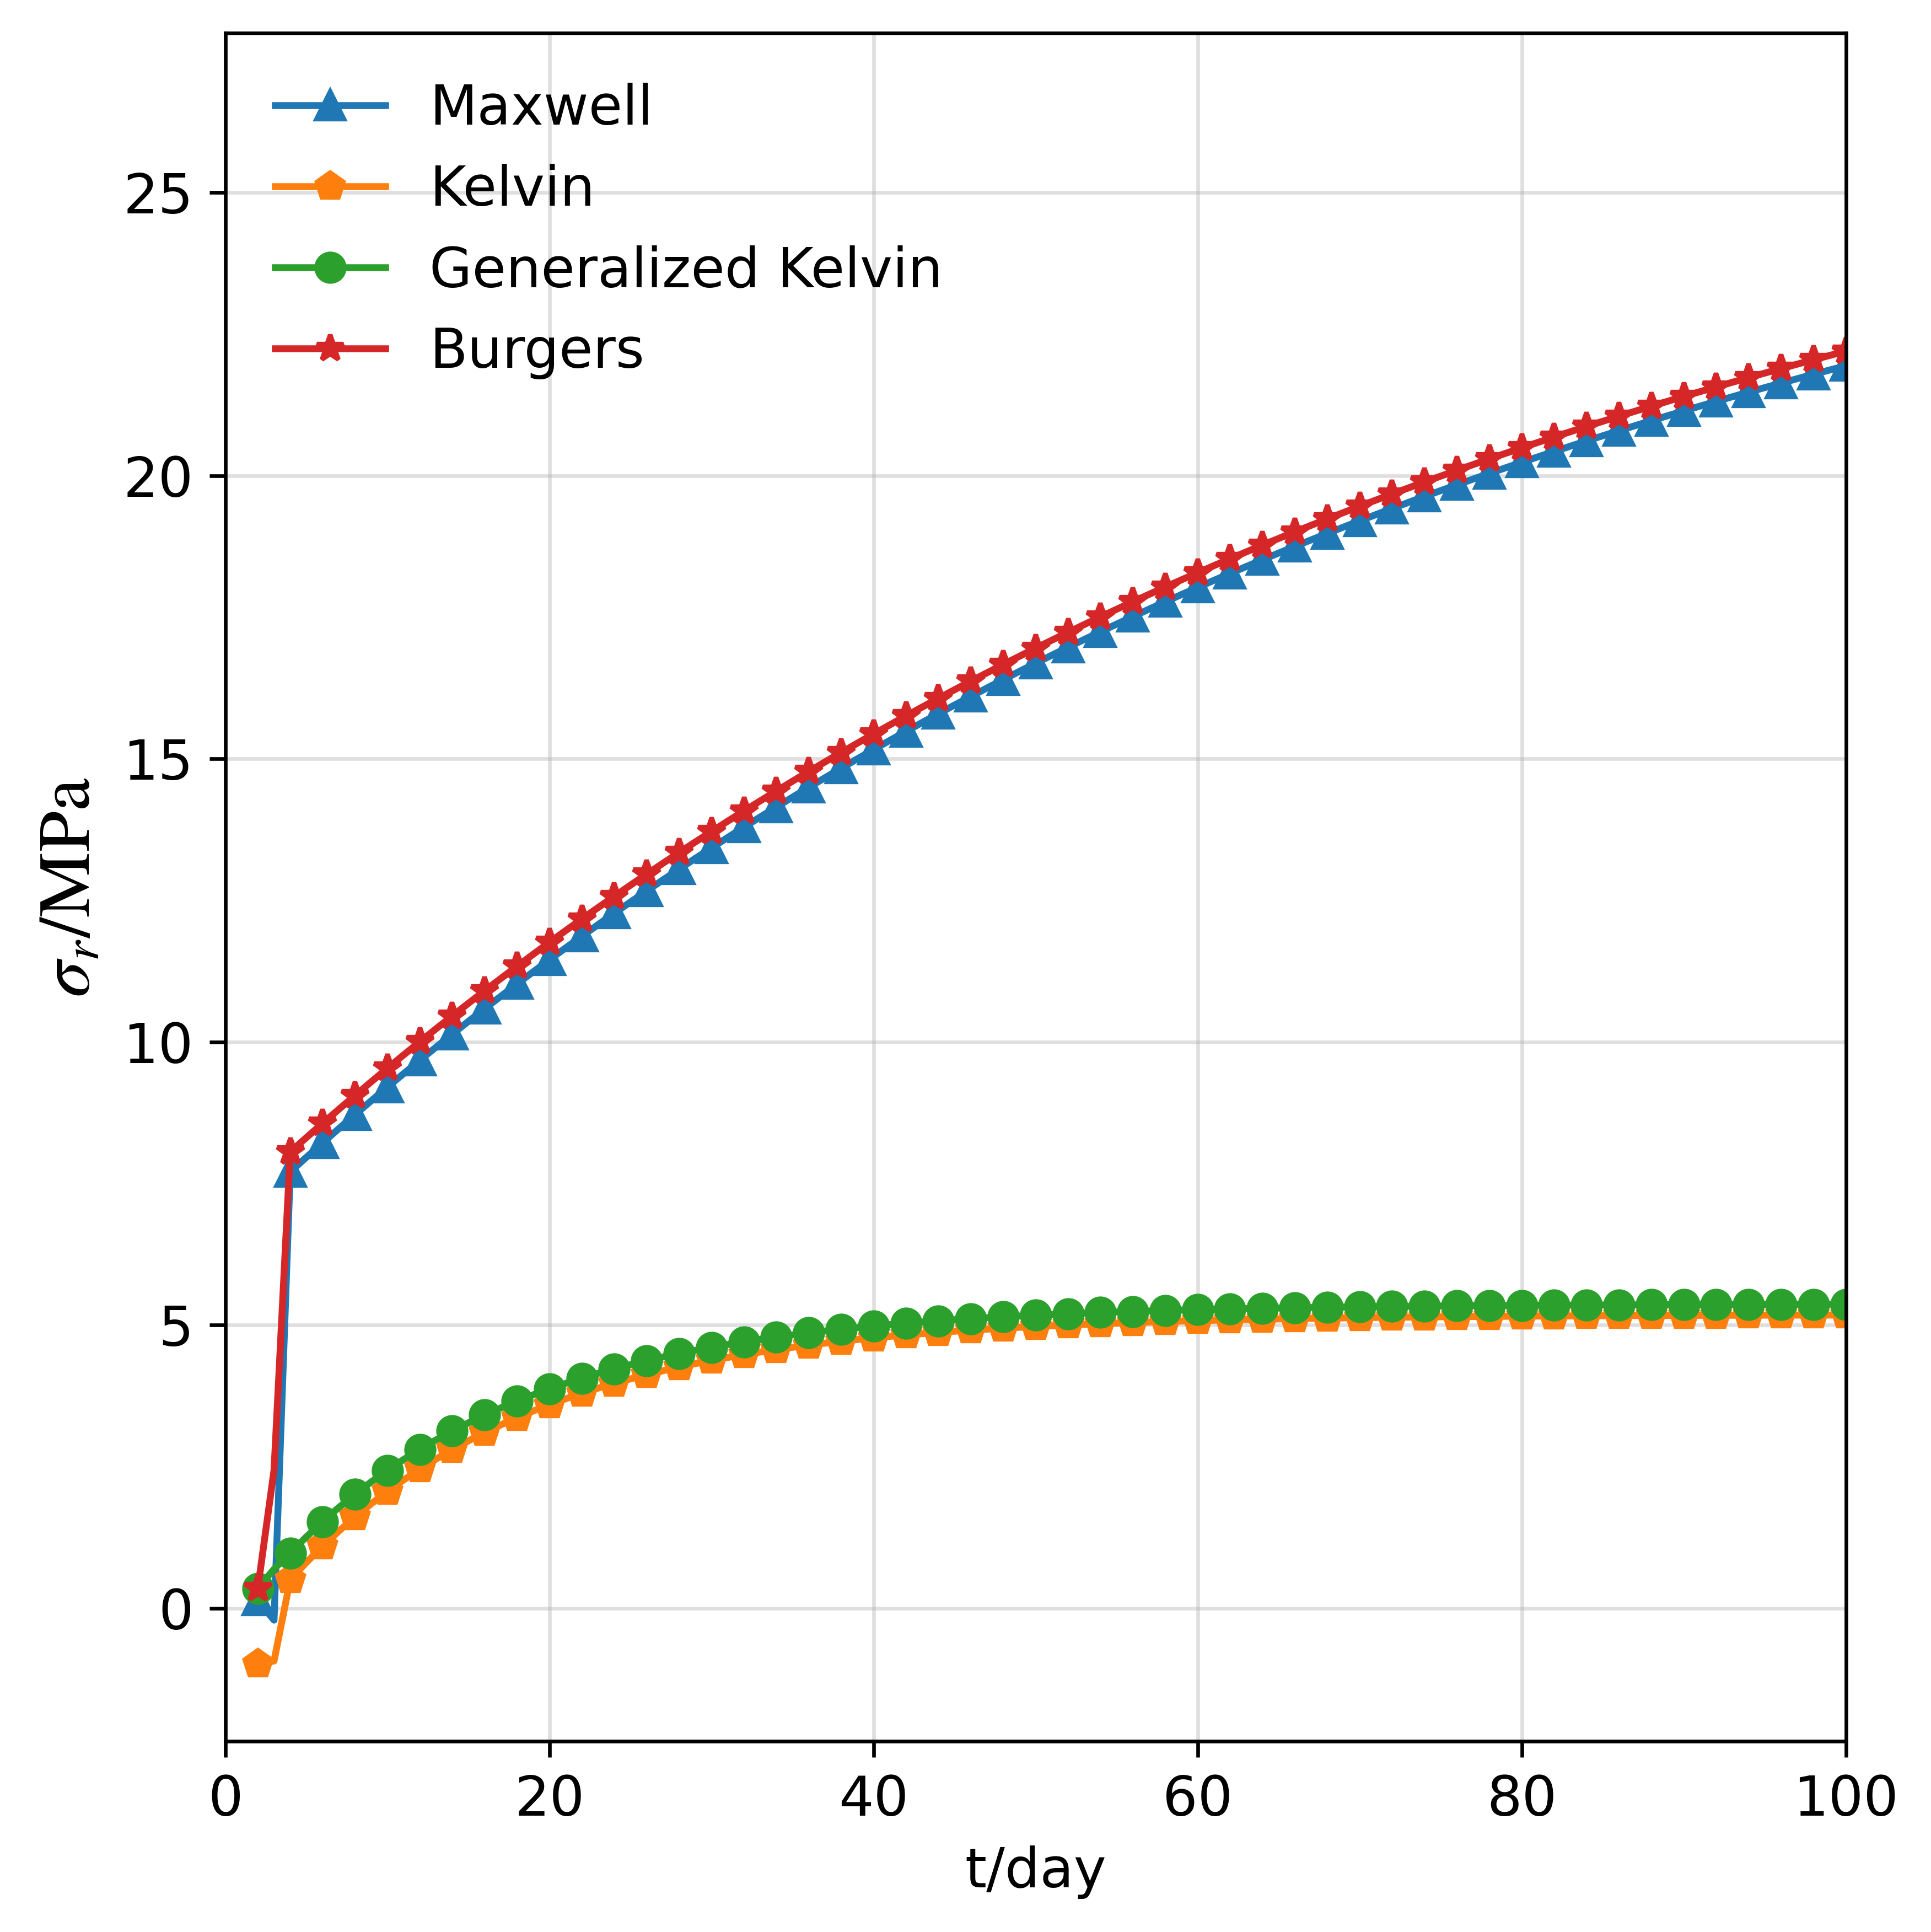

In [557]:
plt.figure(figsize=(6, 6), dpi=600)



plt.plot(result.index.values, result.iloc[:, 0], marker='^', markevery=2, color='tab:blue', label='Maxwell')
plt.plot(result.index.values, result.iloc[:, 5], marker='p', markevery=2, color='tab:orange', label='Kelvin')
plt.plot(result.index.values, result.iloc[:, 10], marker='o', markevery=2, color='tab:green', label='Generalized Kelvin')
plt.plot(result.index.values, result.iloc[:, 15], marker='*', markevery=2, color='tab:red', label='Burgers')
plt.xlim([0, 100])
# plt.ylim([0, 20])
plt.grid('on', alpha=0.4)
plt.xlabel('t/day')
plt.ylabel('$\sigma_r/\mathrm{MPa}$', fontsize=16)
plt.legend(frameon=False)
plt.tight_layout()
# plt.savefig('fig/sigma_r.png', dpi=600)

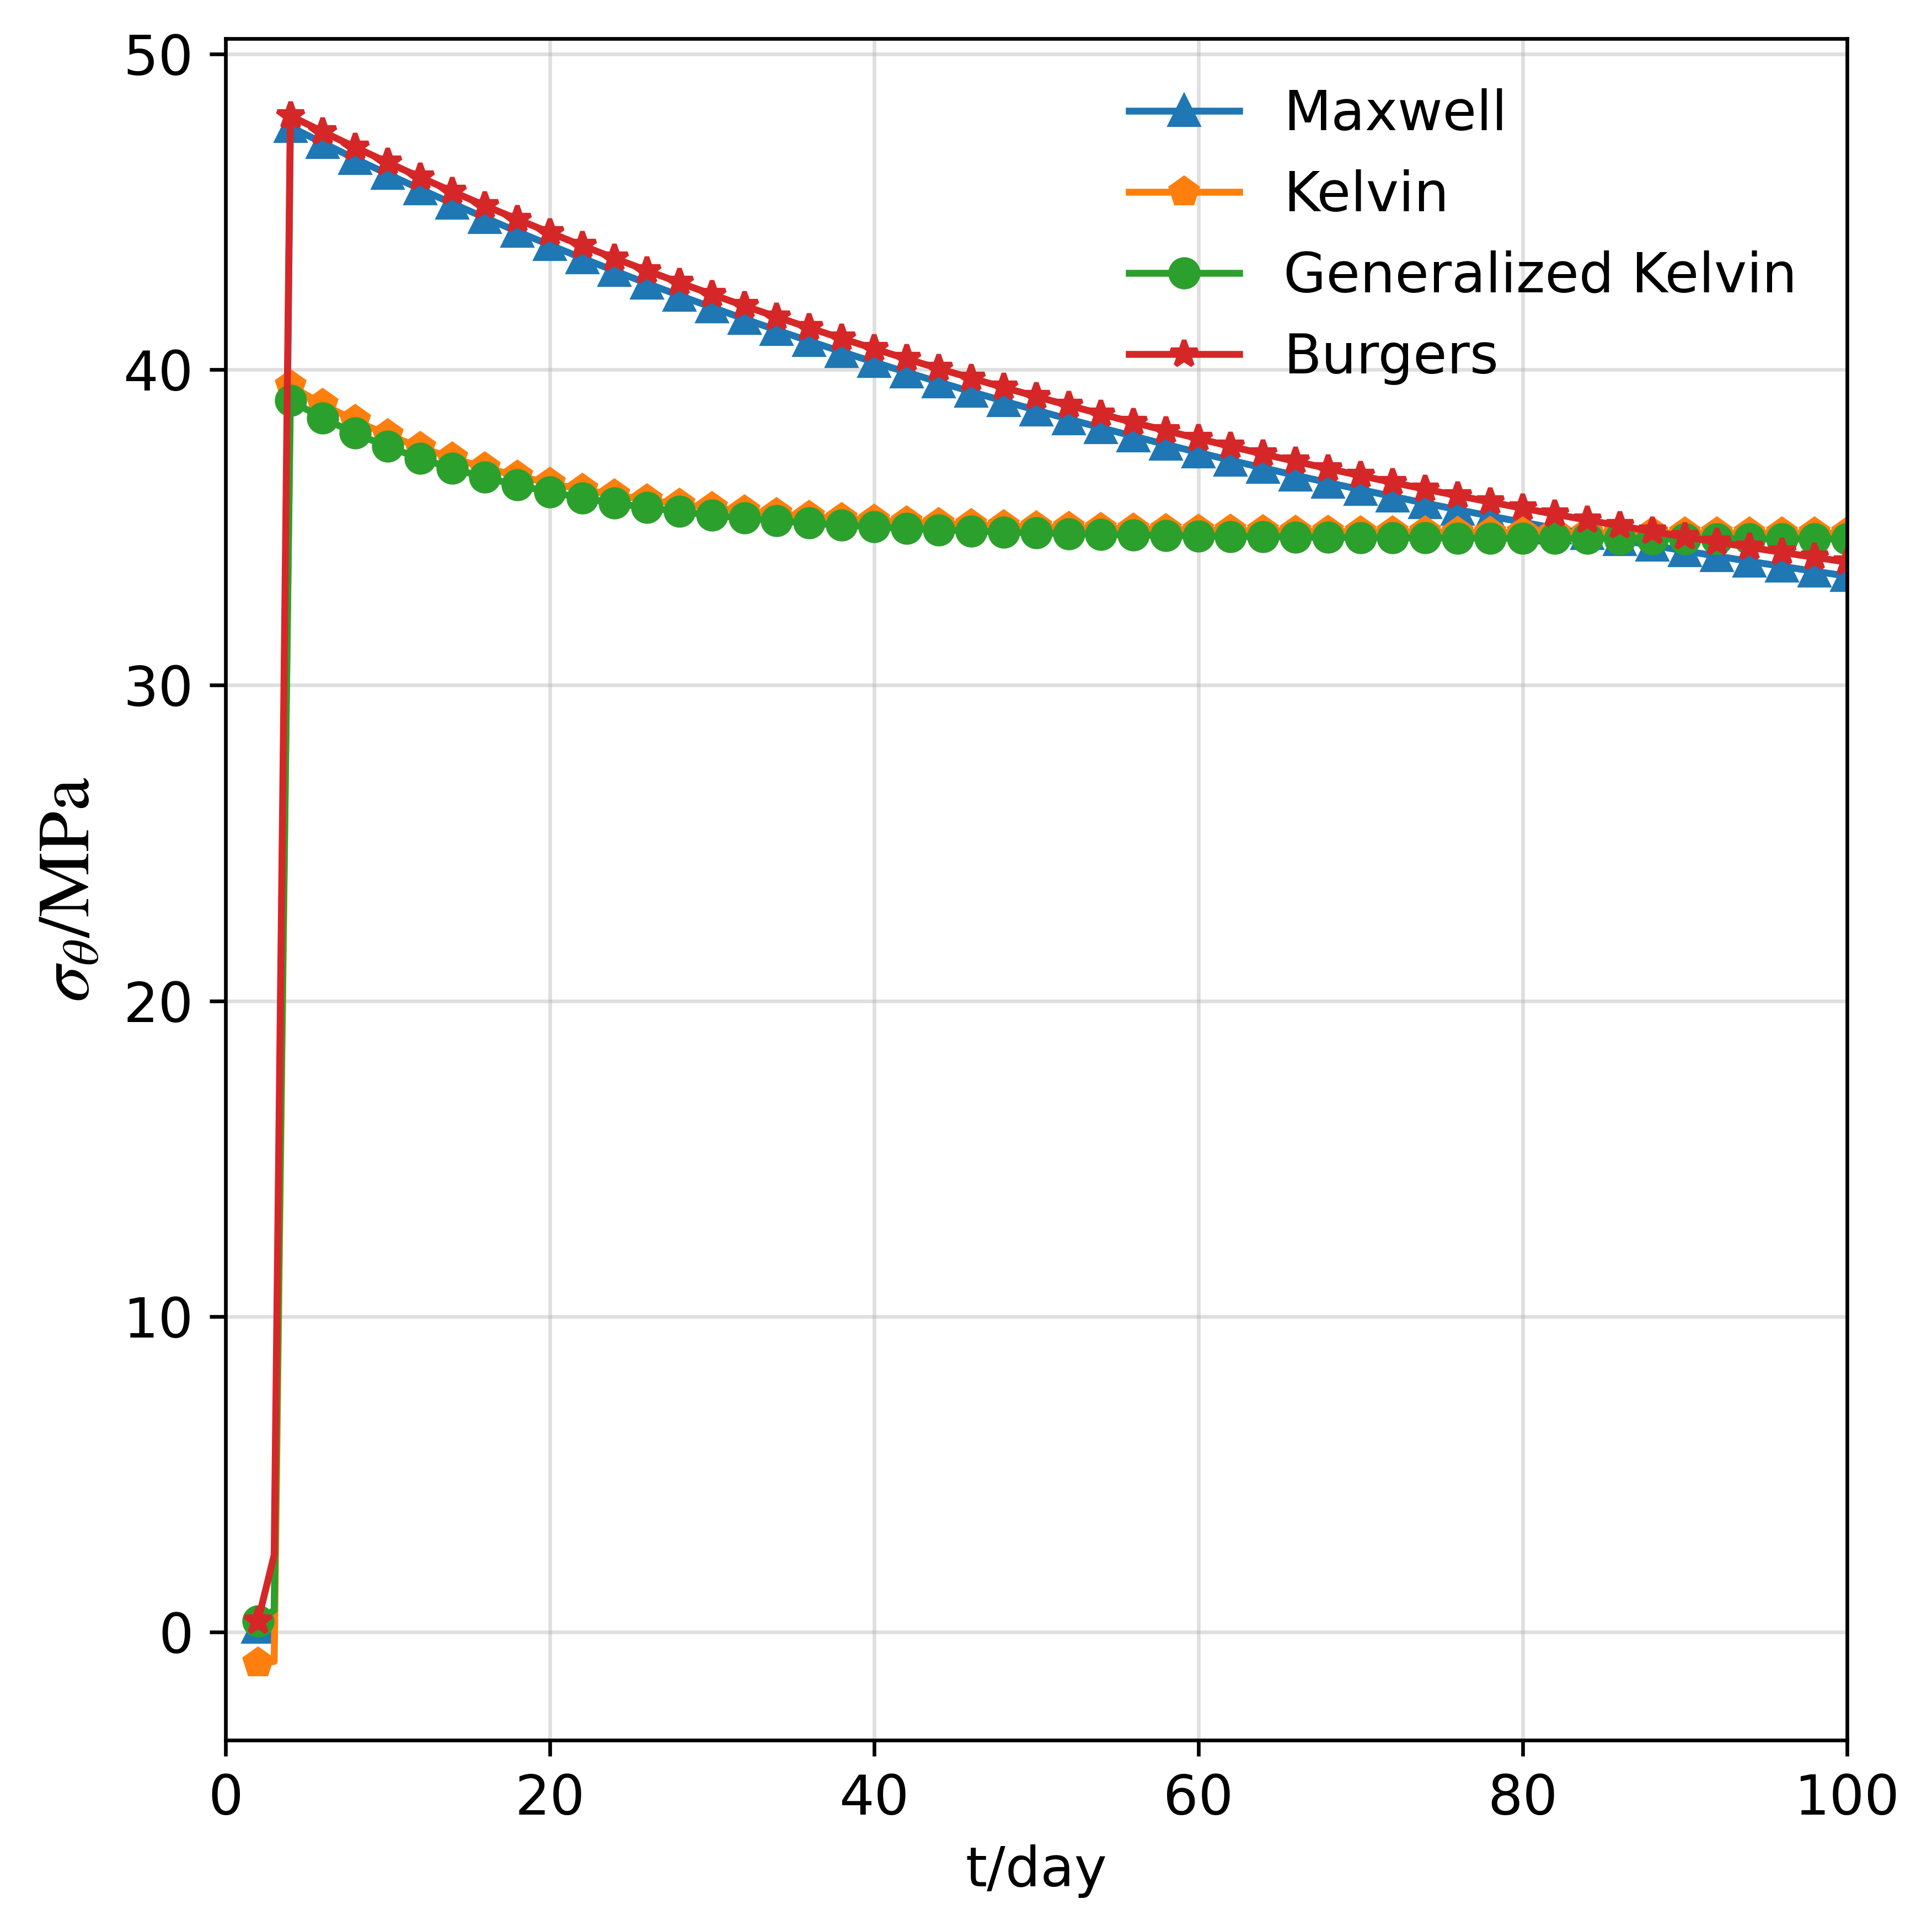

In [558]:
plt.figure(figsize=(6, 6), dpi=600)
plt.plot(result.index.values, result.iloc[:, 1], marker='^', markevery=2, color='tab:blue', label='Maxwell')
plt.plot(result.index.values, result.iloc[:, 6], marker='p', markevery=2, color='tab:orange', label='Kelvin')
plt.plot(result.index.values, result.iloc[:, 11], marker='o', markevery=2, color='tab:green', label='Generalized Kelvin')
plt.plot(result.index.values, result.iloc[:, 16], marker='*', markevery=2, color='tab:red', label='Burgers')
plt.xlim([0, 100])
# plt.ylim([20, 40])
plt.grid('on', alpha=0.4)
plt.xlabel('t/day')
plt.ylabel('$\sigma_\\theta/\mathrm{MPa}$', fontsize=16)
plt.legend(frameon=False)
plt.tight_layout()
# plt.savefig('fig/sigma_theta.png', dpi=600)

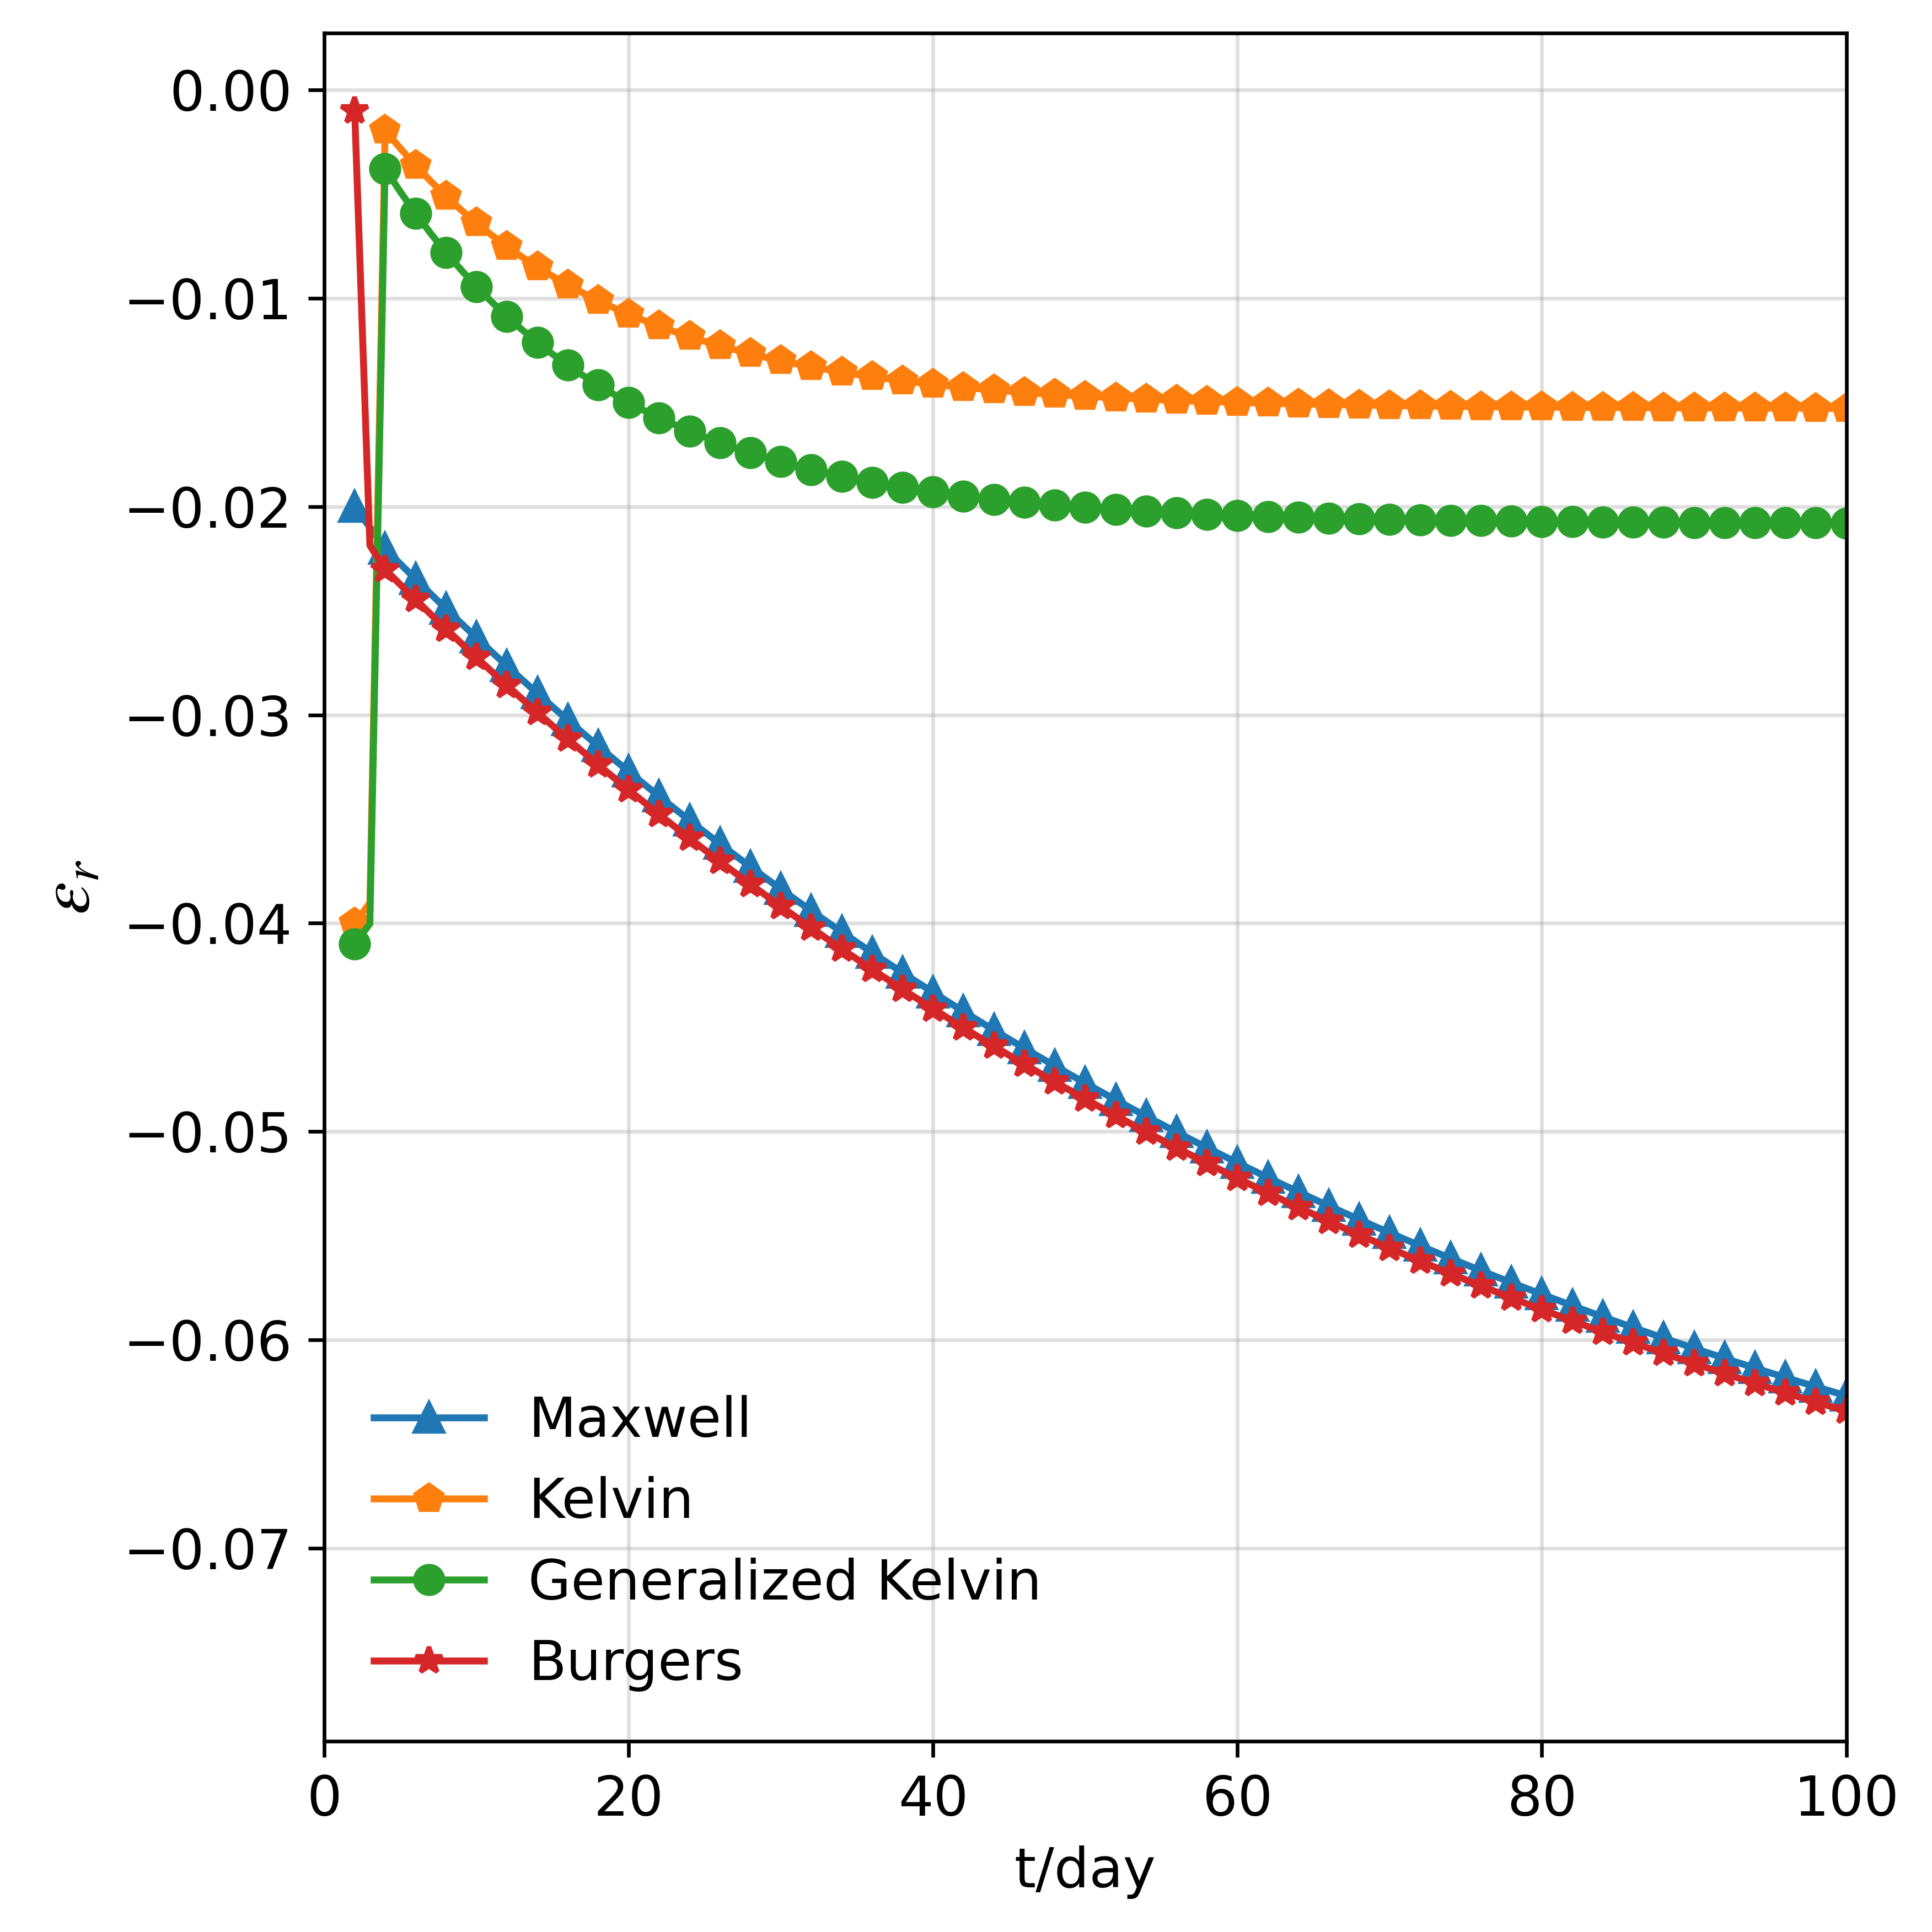

In [559]:
plt.figure(figsize=(6, 6), dpi=600)
plt.plot(result.index.values, result.iloc[:, 2], marker='^', markevery=2, color='tab:blue', label='Maxwell')
plt.plot(result.index.values, result.iloc[:, 7], marker='p', markevery=2, color='tab:orange', label='Kelvin')
plt.plot(result.index.values, result.iloc[:, 12], marker='o', markevery=2, color='tab:green', label='Generalized Kelvin')
plt.plot(result.index.values, result.iloc[:, 17], marker='*', markevery=2, color='tab:red', label='Burgers')
plt.xlim([0, 100])
# plt.ylim([-0.05, 0])
plt.grid('on', alpha=0.4)
plt.xlabel('t/day')
plt.ylabel('$\\varepsilon_r$', fontsize=16)
plt.legend(frameon=False)
plt.tight_layout()
# plt.savefig('fig/varepsilon_r.png', dpi=600)

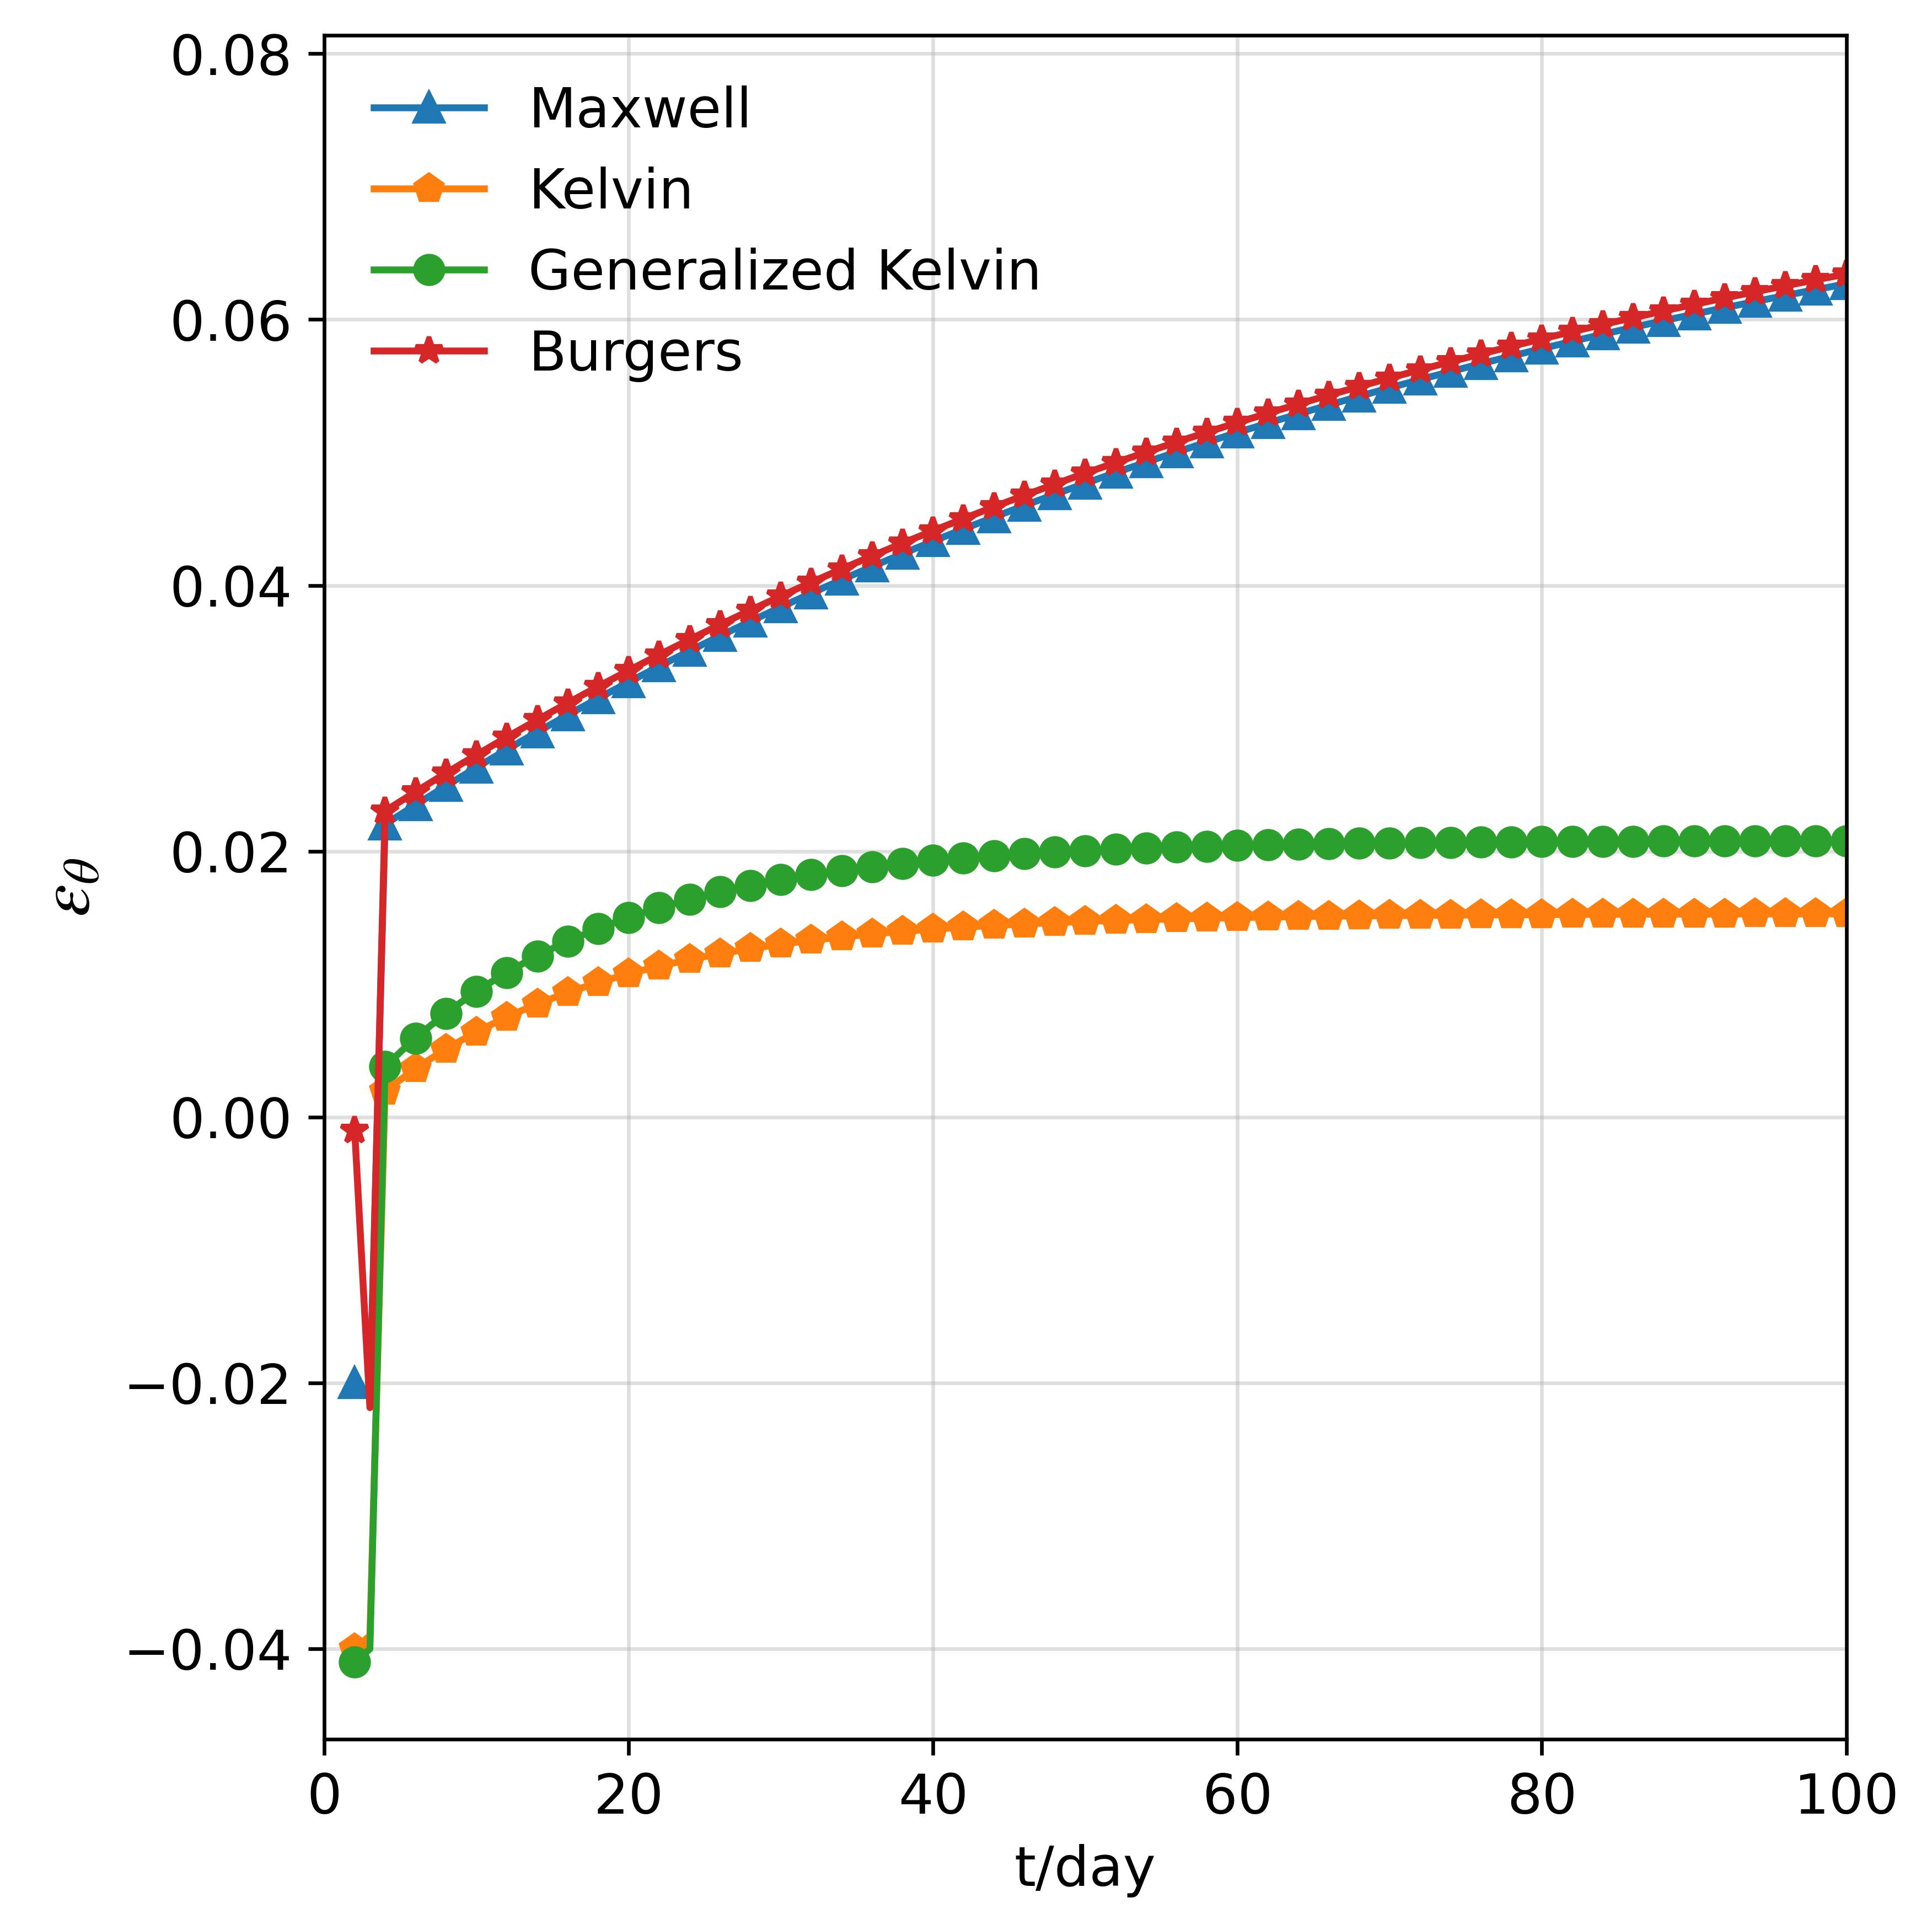

In [560]:
plt.figure(figsize=(6, 6), dpi=600)
plt.plot(result.index.values, result.iloc[:, 3], marker='^', markevery=2, color='tab:blue', label='Maxwell')
plt.plot(result.index.values, result.iloc[:, 8], marker='p', markevery=2, color='tab:orange', label='Kelvin')
plt.plot(result.index.values, result.iloc[:, 13], marker='o', markevery=2, color='tab:green', label='Generalized Kelvin')
plt.plot(result.index.values, result.iloc[:, 18], marker='*', markevery=2, color='tab:red', label='Burgers')
plt.xlim([0, 100])
# plt.ylim([0, 0.05])
plt.grid('on', alpha=0.4)
plt.xlabel('t/day')
plt.ylabel('$\\varepsilon_\\theta$', fontsize=16)
plt.legend(frameon=False)
plt.tight_layout()
# plt.savefig('fig/varepsilon_theta.png', dpi=600)

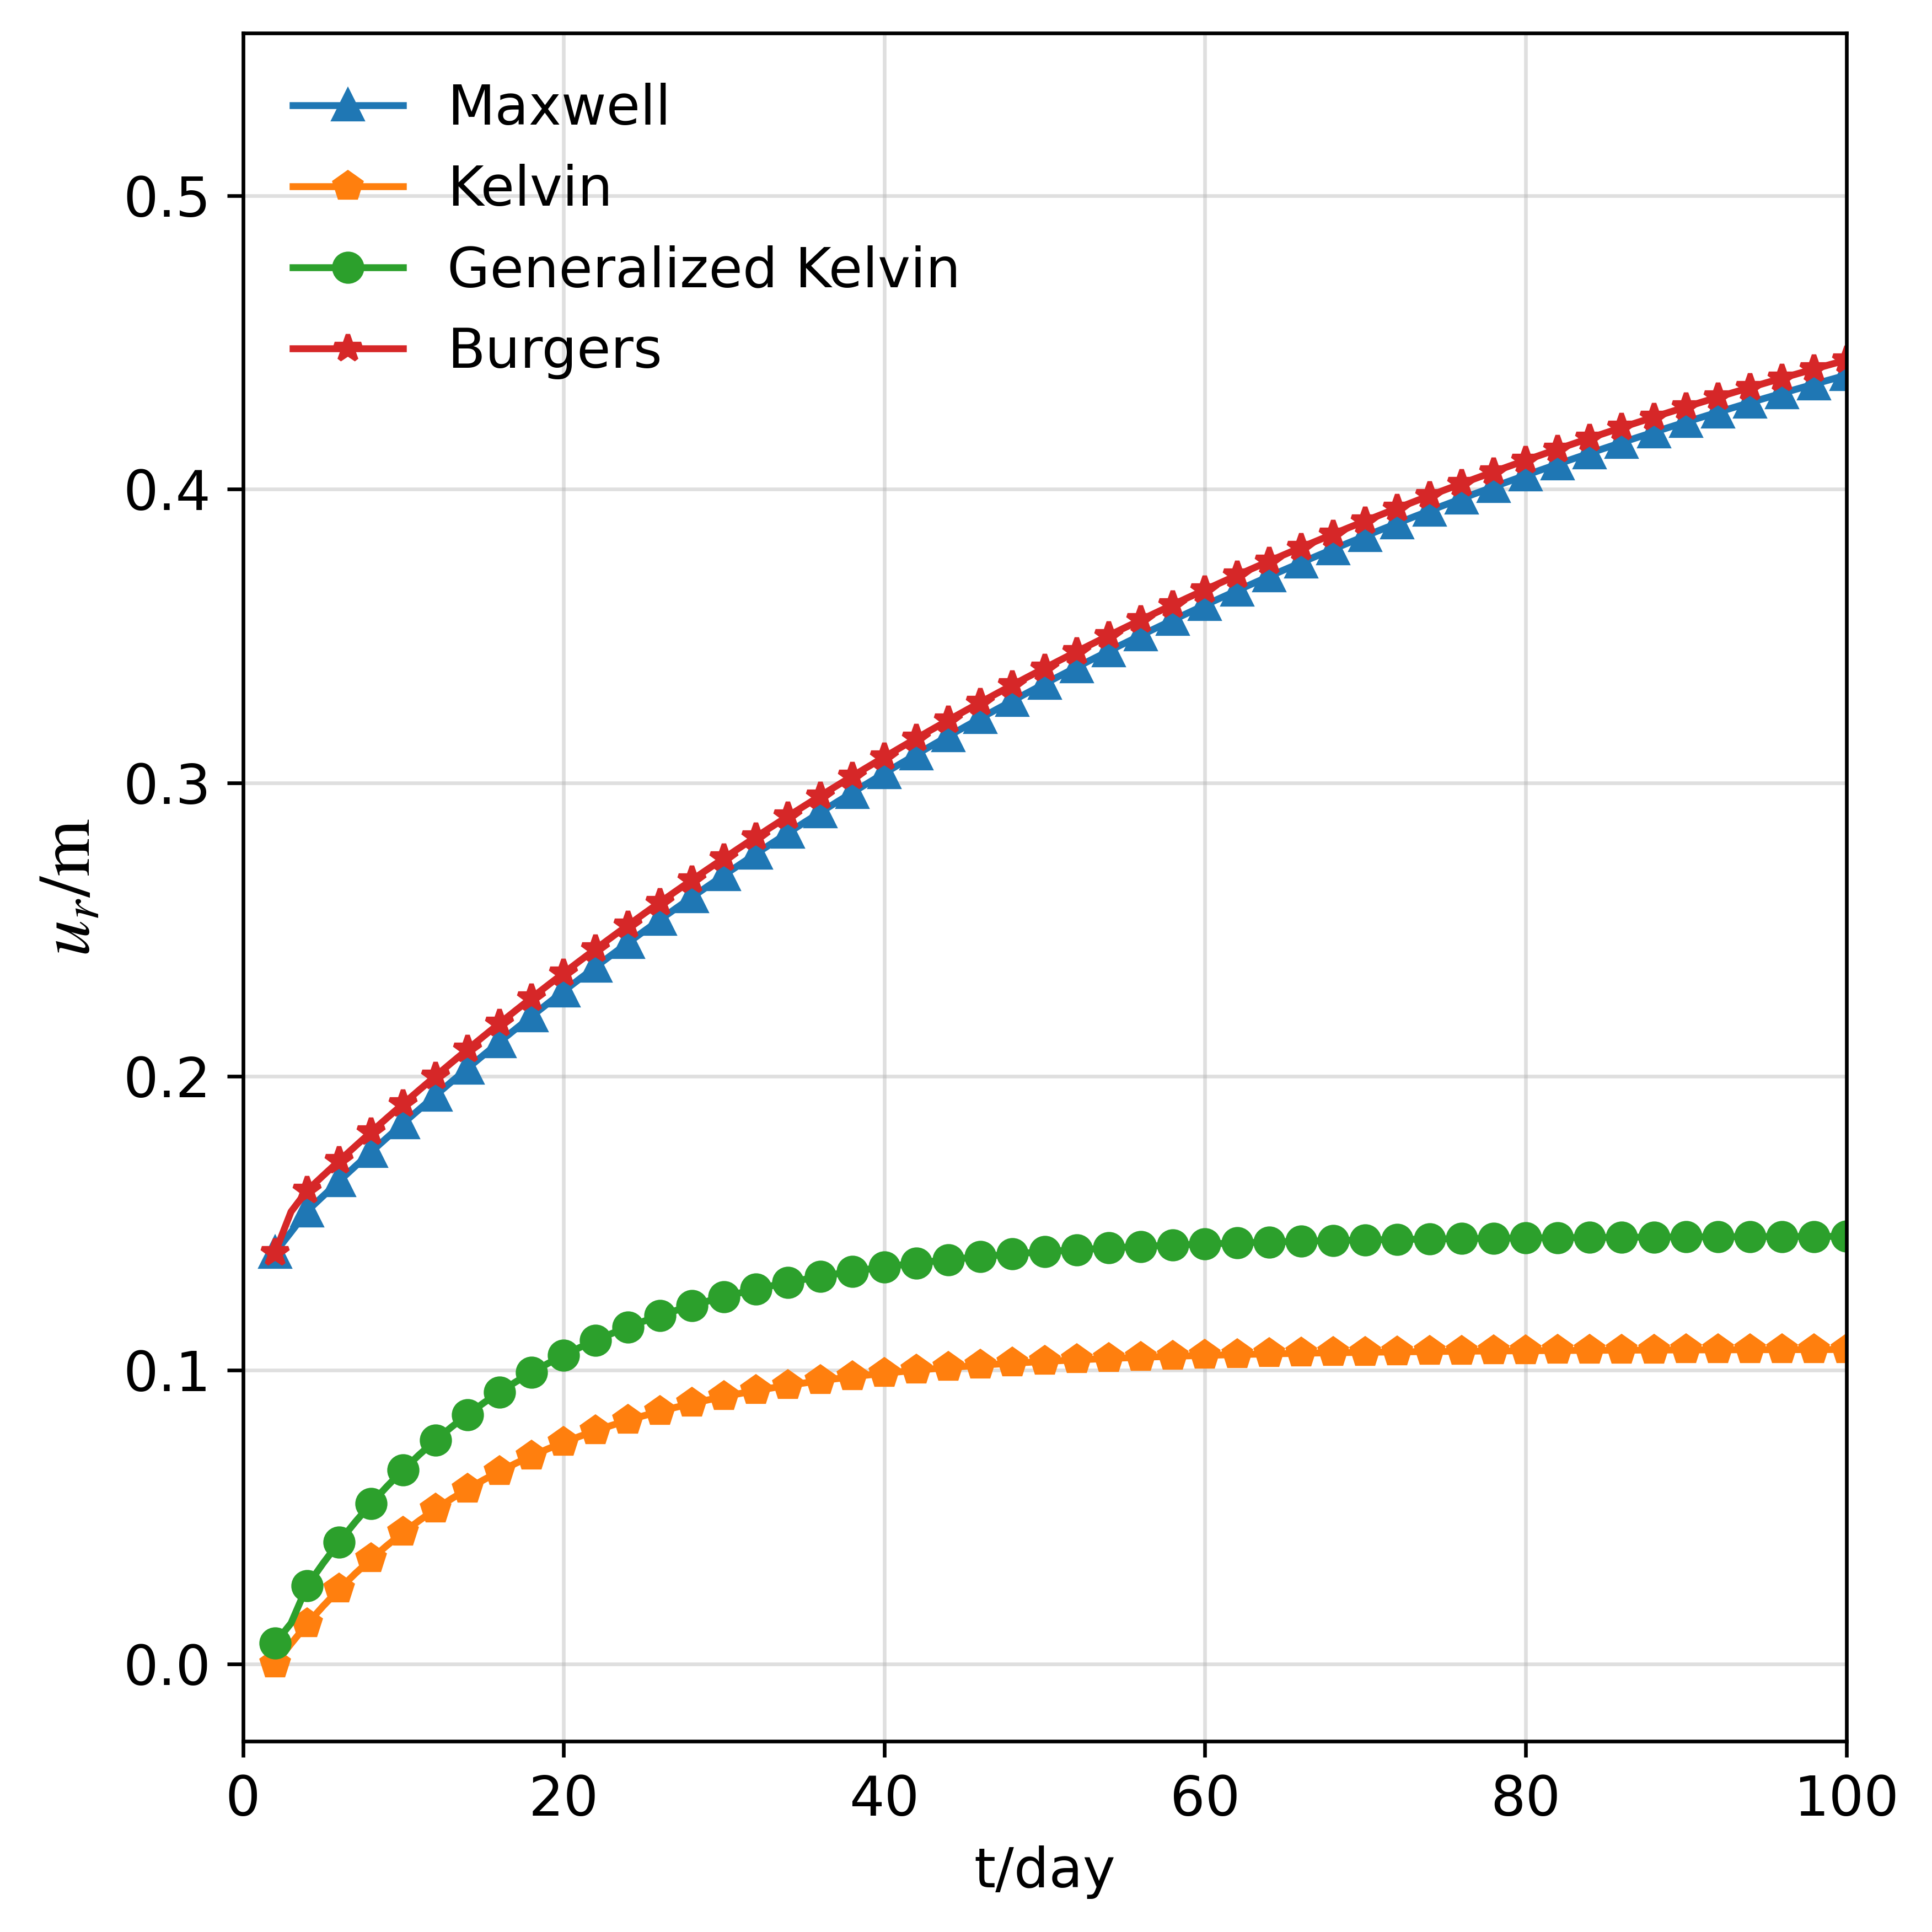

In [561]:
plt.figure(figsize=(6, 6), dpi=600)
plt.plot(result.index.values, result.iloc[:, 4], marker='^', markevery=2, color='tab:blue', label='Maxwell')
plt.plot(result.index.values, result.iloc[:, 9], marker='p', markevery=2, color='tab:orange', label='Kelvin')
plt.plot(result.index.values, result.iloc[:, 14], marker='o', markevery=2, color='tab:green', label='Generalized Kelvin')
plt.plot(result.index.values, result.iloc[:, 19], marker='*', markevery=2, color='tab:red', label='Burgers')
plt.xlim([0, 100])
# plt.ylim([0, 0.35])
plt.grid('on', alpha=0.4)
plt.xlabel('t/day')
plt.ylabel('$u_r/\mathrm{m}$', fontsize=16)
plt.legend(frameon=False)
plt.tight_layout()
# plt.savefig('fig/u_r.png', dpi=600)

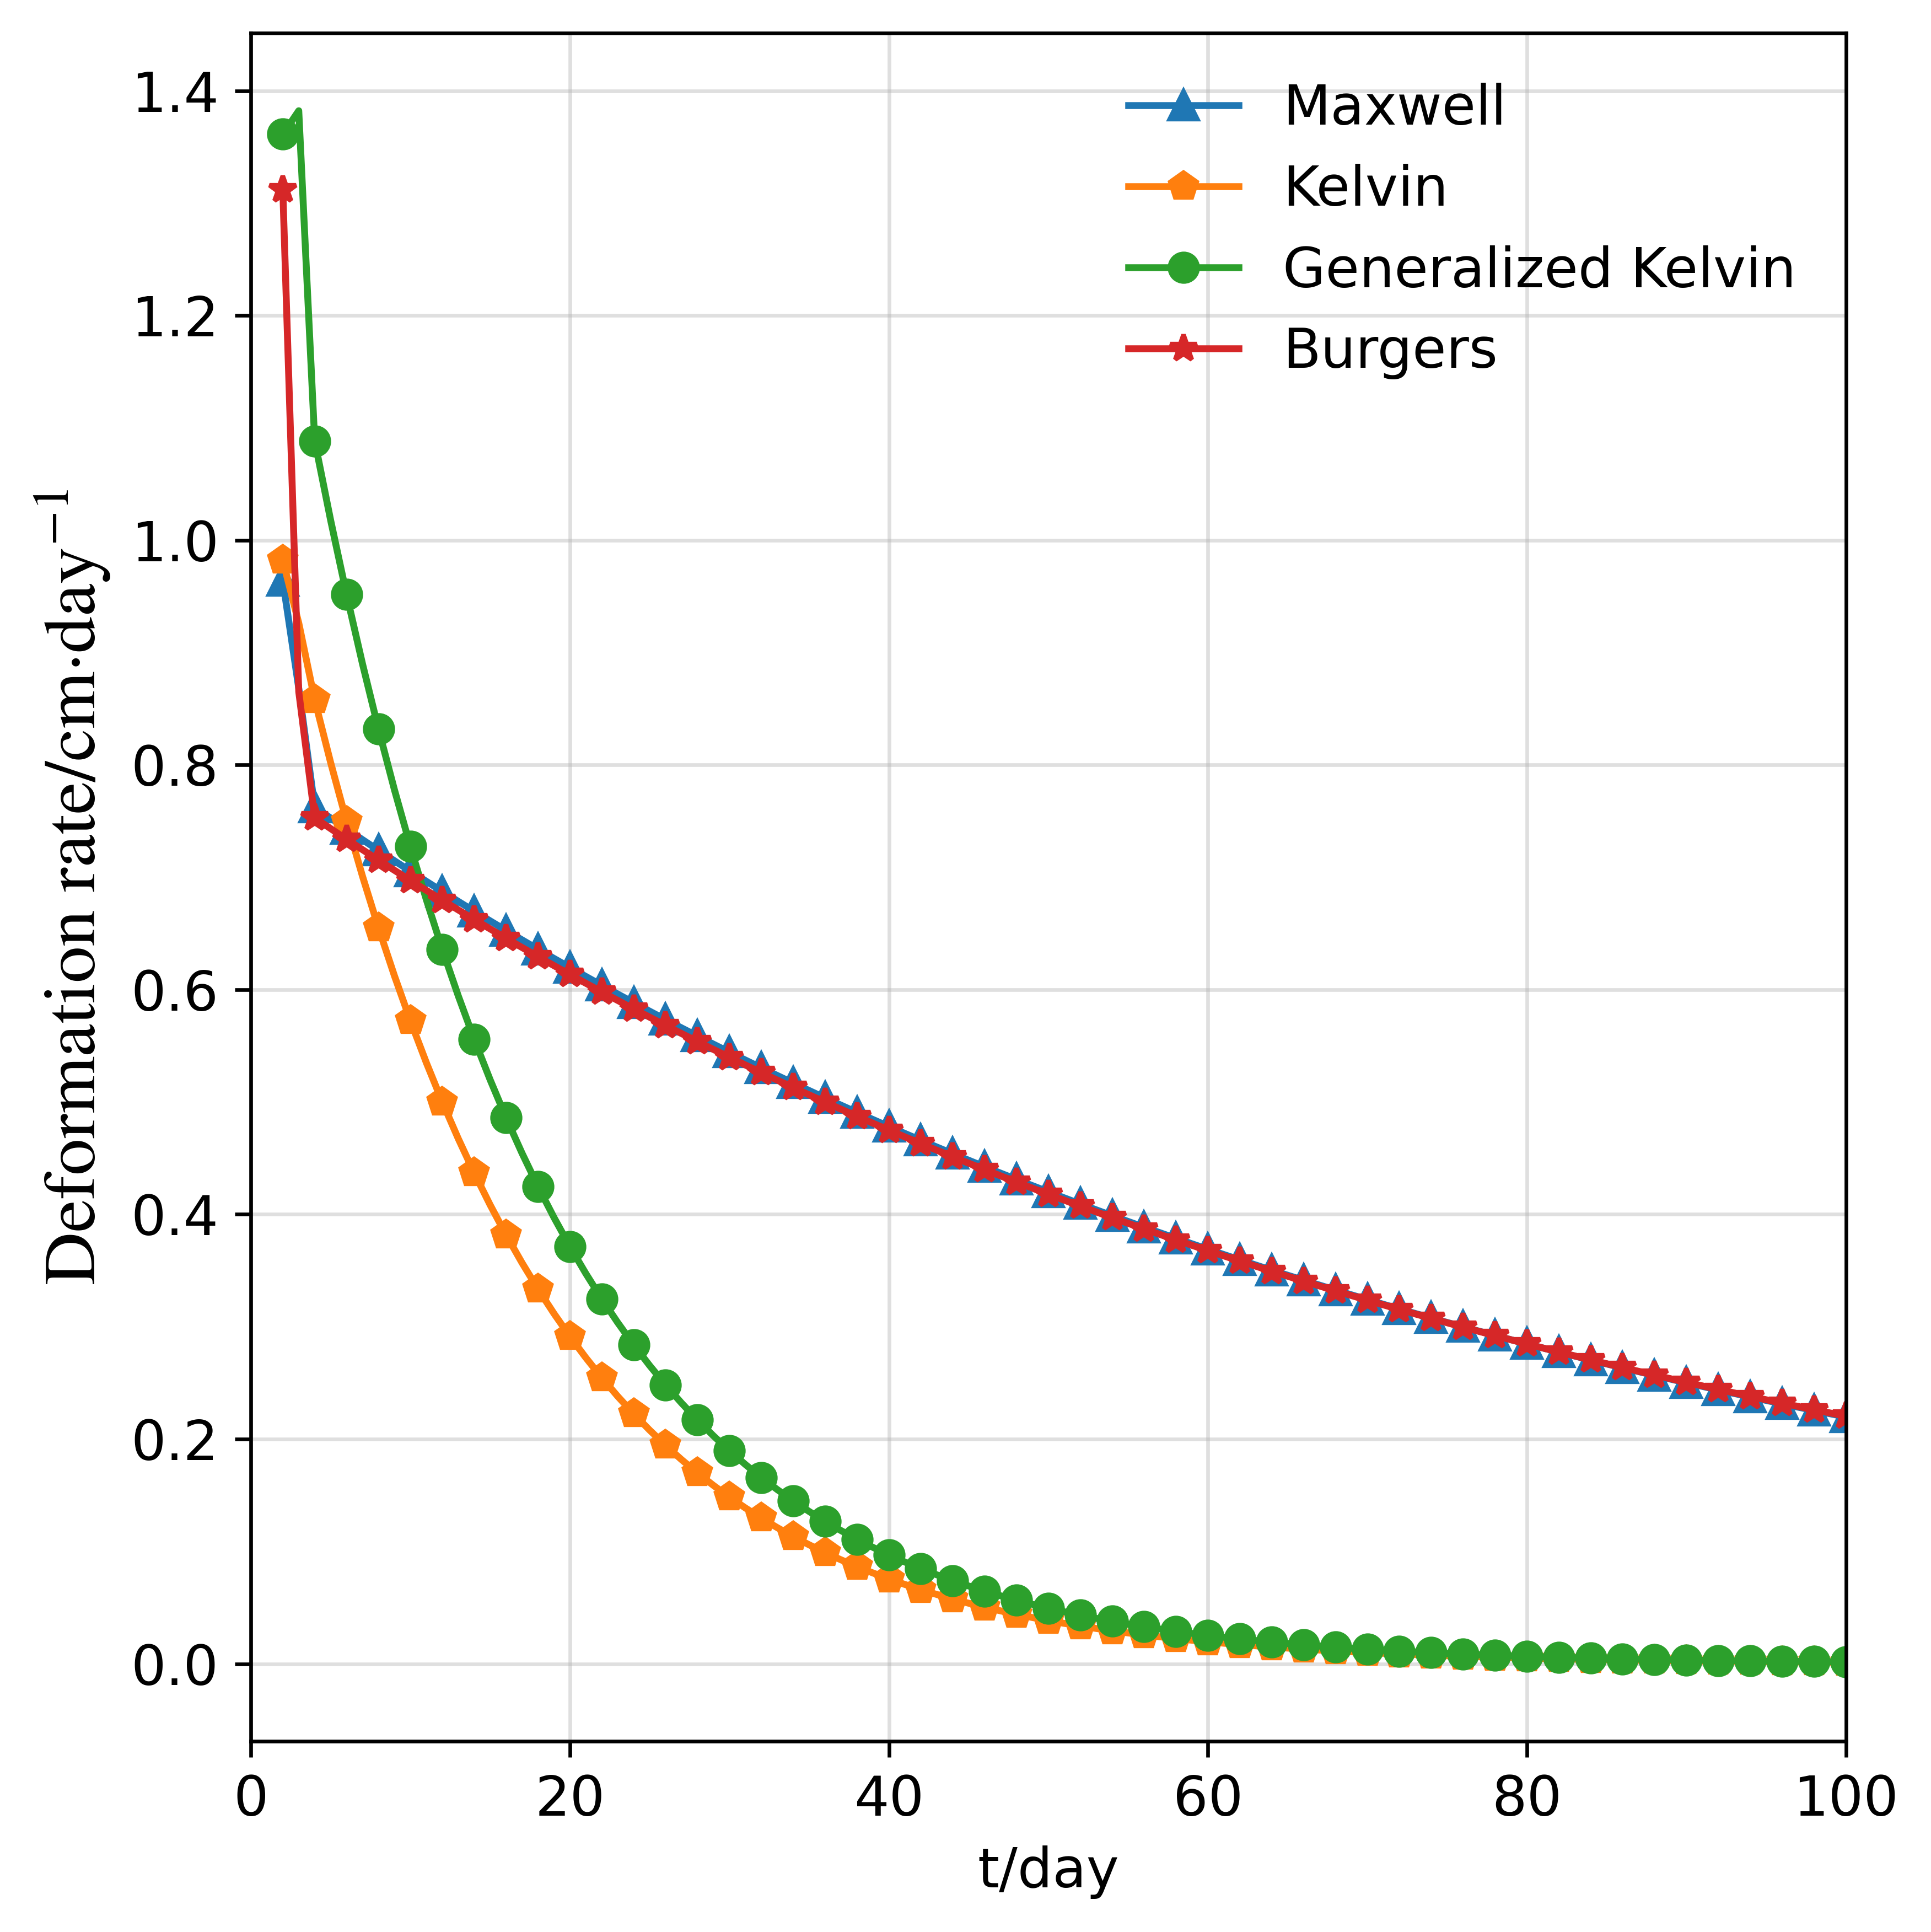

In [562]:
u_r_df = result.iloc[:, [4, 9, 14, 19]]
u_r_t1 = u_r_df.iloc[:-1]
u_r_t2 = u_r_df.iloc[1:]
u_r_t2.index = np.arange(0, 199, 1)
u_r_prime = (u_r_t2 - u_r_t1) / 2 * 100
plt.figure(figsize=(6, 6), dpi=600)
plt.plot(u_r_prime.index.values, u_r_prime.iloc[:, 0], marker='^', markevery=2, color='tab:blue', label='Maxwell')
plt.plot(u_r_prime.index.values, u_r_prime.iloc[:, 1], marker='p', markevery=2, color='tab:orange', label='Kelvin')
plt.plot(u_r_prime.index.values, u_r_prime.iloc[:, 2], marker='o', markevery=2, color='tab:green', label='Generalized Kelvin')
plt.plot(u_r_prime.index.values, u_r_prime.iloc[:, 3], marker='*', markevery=2, color='tab:red', label='Burgers')
plt.xlim([0, 100])
# plt.ylim([0, 1])
plt.grid('on', alpha=0.4)
plt.xlabel('t/day')
plt.ylabel('$\mathrm{Deformation\ rate/cm·day^{-1}}$', fontsize=16)
plt.legend(frameon=False)
plt.tight_layout()
# plt.savefig('fig/Deformation rate.png', dpi=600)